In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings, joblib
warnings.filterwarnings("ignore")

In [2]:
# Step 3: Load the saved model from the file
rf_model = joblib.load('random_forest_model.pkl')
lgb_model = joblib.load('lgb_model.pkl')
catboost_model = joblib.load('catboost_model.pkl')

In [3]:
alpha = pd.read_csv("alpha.csv")
beta = pd.read_csv("beta.csv")
charlie = pd.read_csv("charlie.csv")

alpha = alpha.sample(frac=1).reset_index(drop=True)
beta = beta.sample(frac=1).reset_index(drop=True)
charlie = charlie.sample(frac=1).reset_index(drop=True)


In [4]:
charlie = charlie.drop(columns=["created_at","MG811_Digital","MQ7_Digital"])
beta = beta.drop(columns=["created_at","MG811_Digital","MQ7_Digital"])
alpha = alpha.drop(columns=["created_at","MG811_Digital","MQ7_Digital"])

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have the datasets 'alpha', 'beta', and 'charlie', and the loaded models 'rf_model', 'lgb_model', and 'catboost_model'

# Step 1: Separate the features (X) and target (y) for each dataset
X_alpha = alpha.drop(columns=['CO2',"CO"])
y_alpha = alpha['CO2']

X_beta = beta.drop(columns=['CO2',"CO"])
y_beta = beta['CO2']

X_charlie = charlie.drop(columns=['CO2',"CO"])
y_charlie = charlie['CO2']

# Step 2: Initialize MinMaxScaler
scaler = MinMaxScaler()

# Step 3: Scale the features in each dataset
X_alpha_scaled = scaler.fit_transform(X_alpha)
X_beta_scaled = scaler.fit_transform(X_beta)
X_charlie_scaled = scaler.fit_transform(X_charlie)

# Step 4: Make predictions using the models on each dataset
rpredictions_alpha = rf_model.predict(X_alpha_scaled)
lpredictions_alpha = lgb_model.predict(X_alpha_scaled)
cpredictions_alpha = catboost_model.predict(X_alpha_scaled)

rpredictions_beta = rf_model.predict(X_beta_scaled)
lpredictions_beta = lgb_model.predict(X_beta_scaled)
cpredictions_beta = catboost_model.predict(X_beta_scaled)

rpredictions_charlie = rf_model.predict(X_charlie_scaled)
lpredictions_charlie = lgb_model.predict(X_charlie_scaled)
cpredictions_charlie = catboost_model.predict(X_charlie_scaled)

# Step 5: Calculate evaluation metrics for each model
metrics_data = []

# Function to calculate metrics and append to metrics_data list
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return [rmse, mse, mae, r2]

metrics_data.append(['Random Forest', 'Alpha'] + calculate_metrics(y_alpha, rpredictions_alpha))
metrics_data.append(['LightGBM', 'Alpha'] + calculate_metrics(y_alpha, lpredictions_alpha))
#metrics_data.append(['CatBoost', 'Alpha'] + calculate_metrics(y_alpha, cpredictions_alpha))

metrics_data.append(['Random Forest', 'Beta'] + calculate_metrics(y_beta, rpredictions_beta))
metrics_data.append(['LightGBM', 'Beta'] + calculate_metrics(y_beta, lpredictions_beta))
#metrics_data.append(['CatBoost', 'Beta'] + calculate_metrics(y_beta, cpredictions_beta))

metrics_data.append(['Random Forest', 'Charlie'] + calculate_metrics(y_charlie, rpredictions_charlie))
metrics_data.append(['LightGBM', 'Charlie'] + calculate_metrics(y_charlie, lpredictions_charlie))
#metrics_data.append(['CatBoost', 'Charlie'] + calculate_metrics(y_charlie, cpredictions_charlie))

# Step 6: Create a DataFrame to store the metrics
columns = ['Model', 'Data', 'RMSE', 'MSE', 'MAE', 'R2']
metrics_df = pd.DataFrame(metrics_data, columns=columns)

# Step 7: Display the DataFrame
metrics_df


,Model,Data,RMSE,MSE,MAE,R2
0,Random Forest,Alpha,1.479970,2.190312,0.889417,0.991594
1,LightGBM,Alpha,2.751940,7.573174,1.864847,0.970936
2,Random Forest,Beta,20.611742,424.843888,15.673222,-0.628835
3,LightGBM,Beta,21.529531,463.520726,16.260896,-0.777120
4,Random Forest,Charlie,20.538601,421.834118,15.316096,-0.600493
5,LightGBM,Charlie,21.219296,450.258533,15.801909,-0.708339


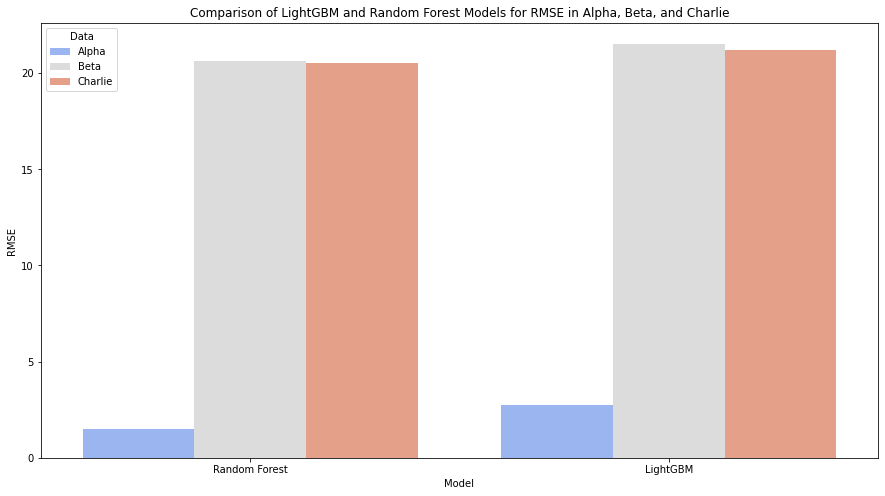

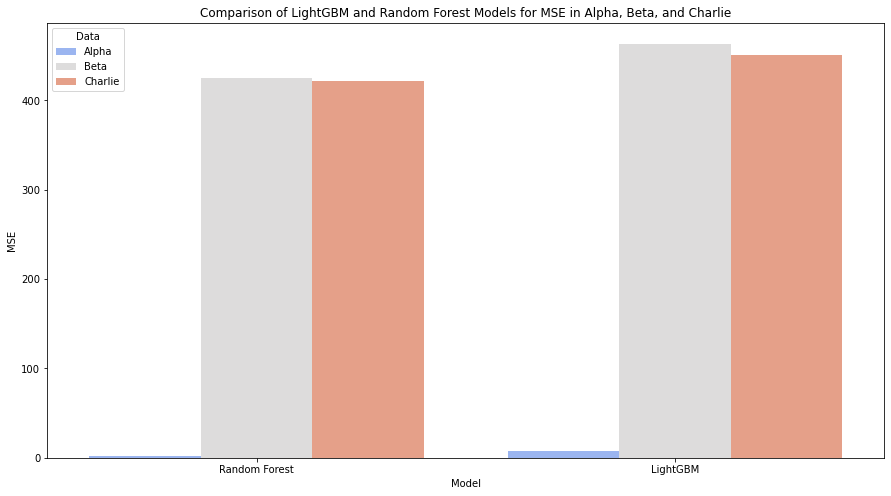

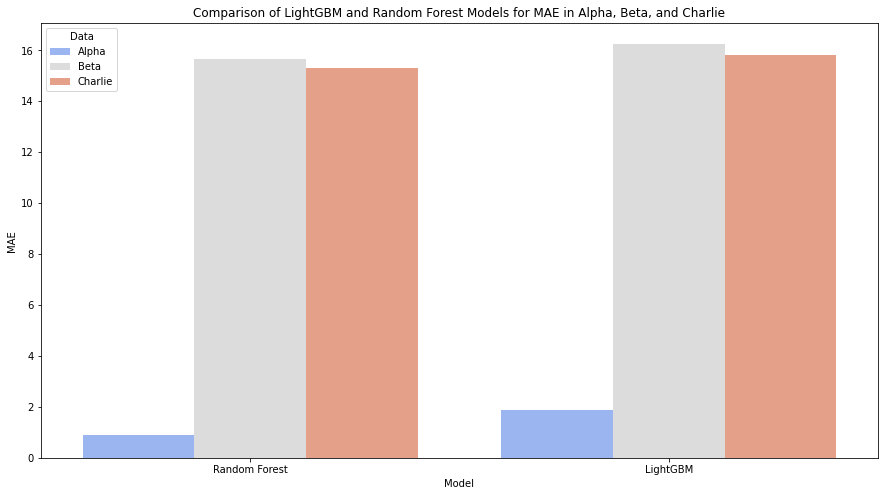

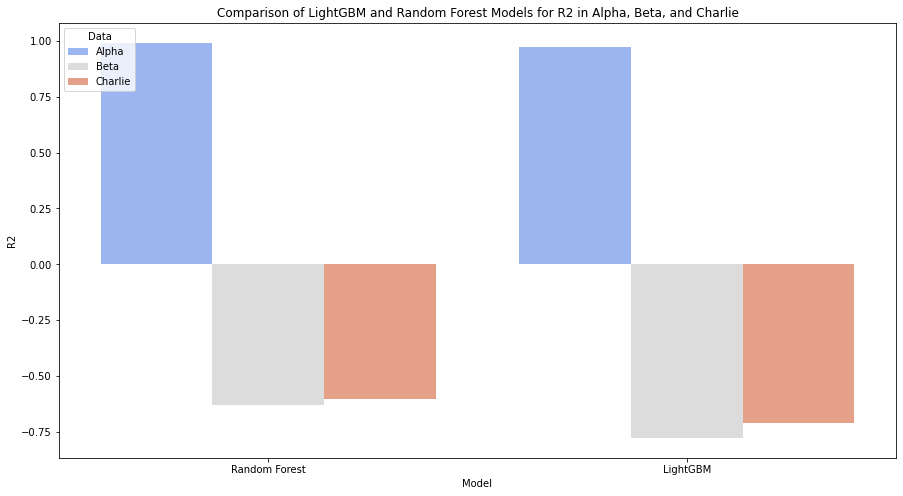

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'metrics_df' as shown above

# Filter the DataFrame to select only LightGBM and Random Forest models
selected_models = ['LightGBM', 'Random Forest', ]
filtered_df = metrics_df[metrics_df['Model'].isin(selected_models)]

# Define the metrics to plot
metrics_to_plot = ['RMSE', 'MSE', 'MAE', 'R2']

# Create separate bar plots for each metric
for metric in metrics_to_plot:
    plt.figure(figsize=(15, 8))
    sns.barplot(x='Model', y=metric, hue='Data', data=filtered_df, palette='coolwarm')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'Comparison of LightGBM and Random Forest Models for {metric} in Alpha, Beta, and Charlie')
    plt.savefig(f'Comparison for {metric} in Alpha, Beta, and Charlie', bbox_inches='tight') 
    plt.legend(title='Data', loc='upper left')
    plt.show()
